**Second Iteration: Daily Activity with 5000 Lux and Above/Number of Hours Awake ~ Sleep Duration/Standarized Bedtime(Offset)**

In [1]:
from SALA import processing
from SALA import plots
import pandas as pd
import numpy as np
import datetime
import statsmodels.api as sm
import seaborn as sns

In [2]:
summer16_raw = pd.read_parquet('data/summer16_raw.parquet')
summer16_raw

,Off-Wrist Status,Activity,Marker,White Light,Red Light,Green Light,Blue Light,Sleep/Wake,Interval Status,UID,Group
DateTime,,,,,,,,,,,
2016-07-12 16:11:00,0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,ACTIVE,summer_160048,summer_16
2016-07-12 16:11:15,0,0.0,0.0,0.0,2.50,1.83,1.82,NaN,ACTIVE,summer_160048,summer_16
2016-07-12 16:11:30,0,0.0,0.0,0.0,1.59,1.83,1.82,NaN,ACTIVE,summer_160048,summer_16
2016-07-12 16:11:45,0,0.0,0.0,0.0,2.50,1.83,1.82,NaN,ACTIVE,summer_160048,summer_16
2016-07-12 16:12:00,0,0.0,0.0,0.0,2.50,1.83,1.82,NaN,ACTIVE,summer_160048,summer_16
...,...,...,...,...,...,...,...,...,...,...,...
2016-07-12 17:18:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EXCLUDED,summer_160024,summer_16
2016-07-12 17:18:15,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EXCLUDED,summer_160024,summer_16
2016-07-12 17:18:30,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EXCLUDED,summer_160024,summer_16


In [3]:
sala_summer16 = pd.read_parquet('data/summer_2016timing.parquet')
sala_summer16

,UID,Date,Threshold,Last Light,Mins to LL from 4AM,First Light,Mins to FL from 4AM,Time above threshold,Time above threshold AM,Minutes above threshold,...,Watch period,DayofWeek,GroupDayofWeek,GroupDayType,Weekend/Holiday,Sleep onset,Sleep offset,Sleep duration,Sleep onset MSLM,Sleep offset MSLM
index,,,,,,,,,,,,,,,,,,,,,
0,summer_160048,2016-07-12,5,NaT,NaN,NaT,NaN,0 days 00:00:00,0 days 00:00:00,0.00,...,0 days 00:00:15,1,summer_16Tues,summer_16Weekday,False,2016-07-12 00:00:00,2016-07-12 00:00:00,0 days 00:00:00,0.00,0.00
1,summer_160048,2016-07-20,5,2016-07-21 01:39:00,1299.0,2016-07-20 09:16:45,316.0,0 days 06:34:45,0 days 01:02:30,394.75,...,0 days 00:00:15,2,summer_16Wed,summer_16Weekday,False,2016-07-21 02:08:30,2016-07-21 08:15:30,0 days 06:07:00,1568.50,495.50
2,summer_160048,2016-07-22,5,2016-07-23 01:56:45,1316.0,2016-07-22 06:22:15,142.0,0 days 02:59:15,0 days 00:59:30,179.25,...,0 days 00:00:15,4,summer_16Fri,summer_16Weekday,False,2016-07-23 02:20:00,2016-07-23 09:39:15,0 days 07:19:15,1580.00,579.25
3,summer_160048,2016-07-27,5,2016-07-27 11:02:15,422.0,2016-07-27 09:09:15,309.0,0 days 00:42:30,0 days 00:42:30,42.50,...,0 days 00:00:15,2,summer_16Wed,summer_16Weekday,False,2016-07-27 00:00:00,2016-07-27 00:00:00,0 days 00:00:00,0.00,0.00
4,summer_160048,2016-07-25,5,2016-07-26 00:38:00,1238.0,2016-07-25 08:44:45,284.0,0 days 07:04:15,0 days 01:23:45,424.25,...,0 days 00:00:15,0,summer_16Mon,summer_16Weekday,False,2016-07-26 00:53:45,2016-07-26 11:36:45,0 days 10:43:00,1493.75,696.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,summer_160024,2016-07-05,500,2016-07-05 22:25:00,1105.0,2016-07-05 07:51:30,231.0,0 days 01:50:15,0 days 00:26:15,110.25,...,0 days 00:00:15,1,summer_16Tues,summer_16Weekday,False,2016-07-06 01:41:30,2016-07-06 06:18:30,0 days 04:37:00,1541.50,378.50
1090,summer_160024,2016-07-08,500,2016-07-09 03:36:15,1416.0,2016-07-08 10:21:15,381.0,0 days 00:59:30,0 days 00:26:45,59.50,...,0 days 00:00:15,4,summer_16Fri,summer_16Weekday,False,2016-07-09 03:47:00,2016-07-09 07:48:45,0 days 04:01:45,1667.00,468.75
1091,summer_160024,2016-07-02,500,2016-07-03 00:23:30,1223.0,2016-07-02 09:51:30,351.0,0 days 01:41:45,0 days 00:48:45,101.75,...,0 days 00:00:15,5,summer_16Sat,summer_16Weekend/Holiday,True,2016-07-03 02:54:30,2016-07-03 13:36:30,0 days 10:42:00,1614.50,816.50


In [4]:
#calculate total activity from wakeup to sleep and divides it by the amount of time the person was awake aka sleep-wakeup
def calculateActivity(wakeup, sleep, raw):
    if len(raw[(raw['DateTime']>wakeup) & (raw['DateTime']<sleep)].groupby('Group').sum().get('Activity')) == 0:
        return 0
    total_activity = raw[(raw['DateTime']>wakeup) & (raw['DateTime']<sleep)].groupby('Group').sum().get('Activity').iloc[0]
    total_hrs_awake = (sleep-wakeup)/datetime.timedelta(hours=1) #number of hours awake
    return total_activity/total_hrs_awake

In [5]:
def addActivityInfo(sleep_df, raw):
    length = sleep_df.shape[0]
    for i in range(length-1):
        sleep_df.iloc[i,sleep_df.columns.get_loc('Activity')] = calculateActivity(sleep_df['Sleep offset'].iloc[i], sleep_df['Sleep onset'].iloc[i+1], raw)
    return sleep_df
#winter0112.Date.array.strftime("%d").astype(int) might be useful for checking if person goes to sleep next day

In [6]:
def completeActivityDataframe(sleep_df, raw):
    useful_columns = ['UID', 'Date', 'GroupDayType', 'Sleep onset', 'Sleep offset', 'Sleep duration', 'Sleep onset MSLM', 'Sleep offset MSLM']
    sleep_df = sleep_df[useful_columns].drop_duplicates() #clean sleep_df
    zero_array = sleep_df.shape[0]*[0]
    sleep_df['Activity'] = zero_array
    raw = raw.reset_index().sort_values(by='DateTime')
    output = pd.DataFrame()
    for uid in sleep_df.UID.unique():
        unique_df = sleep_df[sleep_df['UID'] == uid].sort_values('Date')
        unique_raw = raw[raw['UID'] == uid]
        output = output.append(addActivityInfo(unique_df, unique_raw))
    return output


In [7]:
#https://docs.microsoft.com/en-us/windows/win32/sensorsapi/understanding-and-interpreting-lux-values
summer16_raw_outdoors = summer16_raw[summer16_raw['White Light']>5001]
outdoor_activity_summer16 = completeActivityDataframe(sala_summer16, summer16_raw_outdoors)
outdoor_activity_summer16

,UID,Date,GroupDayType,Sleep onset,Sleep offset,Sleep duration,Sleep onset MSLM,Sleep offset MSLM,Activity
index,,,,,,,,,
0,summer_160048,2016-07-12,summer_16Weekday,2016-07-12 00:00:00,2016-07-12 00:00:00,0 days 00:00:00,0.00,0.00,7.188577
14,summer_160048,2016-07-13,summer_16Weekday,2016-07-14 02:46:30,2016-07-14 08:49:15,0 days 06:02:45,1606.50,529.25,91.896756
9,summer_160048,2016-07-14,summer_16Weekday,2016-07-15 02:25:00,2016-07-15 12:27:30,0 days 10:02:30,1585.00,747.50,386.205160
5,summer_160048,2016-07-15,summer_16Weekday,2016-07-16 01:42:00,2016-07-16 09:03:00,0 days 07:21:00,1542.00,543.00,45.361522
15,summer_160048,2016-07-16,summer_16Weekend/Holiday,2016-07-17 04:45:30,2016-07-17 13:34:30,0 days 08:49:00,1725.50,814.50,103.634461
...,...,...,...,...,...,...,...,...,...
1093,summer_160024,2016-07-08,summer_16Weekday,2016-07-09 03:47:00,2016-07-09 07:48:45,0 days 04:01:45,1667.00,468.75,17.779767
1088,summer_160024,2016-07-09,summer_16Weekend/Holiday,2016-07-10 02:25:45,2016-07-10 07:24:15,0 days 04:58:30,1585.75,444.25,254.675325
1085,summer_160024,2016-07-10,summer_16Weekend/Holiday,2016-07-10 22:48:15,2016-07-11 07:43:00,0 days 08:54:45,1368.25,463.00,0.000000


In [8]:
#converts column Sleep duration from a timedelta to a float
def timedeltaToFloat(timedelta):
    return timedelta/datetime.timedelta(hours=1)

def sleepDurationToFloat(activity_df):
    activity_df['Sleep duration'] = activity_df['Sleep duration'].apply(timedeltaToFloat)
    
def addBedtime(activity_df):
    activity_df['bedtime'] = activity_df['Sleep onset'].dt.strftime("%H").astype(int) + activity_df['Sleep onset'].dt.strftime("%M").astype(int)/60
    

In [9]:
sleepDurationToFloat(outdoor_activity_summer16)

In [10]:
addBedtime(outdoor_activity_summer16)

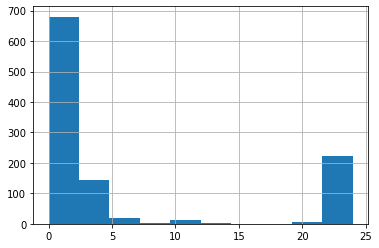

In [11]:
hist = outdoor_activity_summer16['bedtime'].hist(bins=10)

In [12]:
#find earliest bedtime
outdoor_activity_summer16[outdoor_activity_summer16['bedtime']>15].sort_values(by='bedtime').head(10)
#19.233 or 7:14pm

,UID,Date,GroupDayType,Sleep onset,Sleep offset,Sleep duration,Sleep onset MSLM,Sleep offset MSLM,Activity,bedtime
index,,,,,,,,,,
502,summer_160049,2016-07-22,summer_16Weekday,2016-07-22 19:14:45,2016-07-23 01:47:15,6.541667,1154.75,107.25,0.000000,19.233333
424,summer_160053,2016-07-25,summer_16Weekday,2016-07-25 20:37:15,2016-07-26 06:50:00,10.212500,1237.25,410.00,34.011775,20.616667
984,summer_160045,2016-06-30,summer_16Weekday,2016-06-30 20:38:15,2016-07-01 04:58:15,8.333333,1238.25,298.25,112.108475,20.633333
808,summer_160067,2016-07-15,summer_16Weekday,2016-07-15 20:54:45,2016-07-16 07:07:30,10.212500,1254.75,427.50,7.848800,20.900000
698,summer_160060,2016-07-15,summer_16Weekday,2016-07-15 20:59:00,2016-07-16 04:28:15,7.487500,1259.00,268.25,1171.867925,20.983333
46,summer_160030,2016-06-29,summer_16Weekday,2016-06-29 21:24:15,2016-06-30 06:13:30,8.820833,1284.25,373.50,5.586298,21.400000
235,summer_160032,2016-07-11,summer_16Weekday,2016-07-11 21:35:00,2016-07-12 05:21:00,7.766667,1295.00,321.00,0.000000,21.583333
230,summer_160032,2016-06-30,summer_16Weekday,2016-06-30 21:44:45,2016-07-01 05:23:00,7.637500,1304.75,323.00,136.668861,21.733333
543,summer_160052,2016-07-21,summer_16Weekday,2016-07-21 21:44:45,2016-07-22 06:12:45,8.466667,1304.75,372.75,40.996441,21.733333


In [13]:
#earliest_bedtime must be greater than all bedtimes in activity_df. Even if it's just by 0.0001
def standarize_bedtime(bedtime, earliest_bedtime):
    earliest_bedtime-=.00001
    if earliest_bedtime<=bedtime<=24:
        return bedtime-earliest_bedtime
    elif bedtime<16:
        return (24-earliest_bedtime)+bedtime
    else:
        return "error with standarizing"
    
def add_standarize_bedtime(activity_df, earliest_bedtime):
    activity_df['standarized_bedtime'] = activity_df['bedtime'].apply(standarize_bedtime, earliest_bedtime = earliest_bedtime)


In [14]:
add_standarize_bedtime(outdoor_activity_summer16, 19.23333)

In [15]:
#outdoor_activity_summer16['standarized_bedtime'] = outdoor_activity_summer16['bedtime'].apply(standarize_bedtime, earliest_bedtime = 19.23333)


In [16]:
outdoor_activity_summer16

,UID,Date,GroupDayType,Sleep onset,Sleep offset,Sleep duration,Sleep onset MSLM,Sleep offset MSLM,Activity,bedtime,standarized_bedtime
index,,,,,,,,,,,
0,summer_160048,2016-07-12,summer_16Weekday,2016-07-12 00:00:00,2016-07-12 00:00:00,0.000000,0.00,0.00,7.188577,0.000000,4.766680
14,summer_160048,2016-07-13,summer_16Weekday,2016-07-14 02:46:30,2016-07-14 08:49:15,6.045833,1606.50,529.25,91.896756,2.766667,7.533347
9,summer_160048,2016-07-14,summer_16Weekday,2016-07-15 02:25:00,2016-07-15 12:27:30,10.041667,1585.00,747.50,386.205160,2.416667,7.183347
5,summer_160048,2016-07-15,summer_16Weekday,2016-07-16 01:42:00,2016-07-16 09:03:00,7.350000,1542.00,543.00,45.361522,1.700000,6.466680
15,summer_160048,2016-07-16,summer_16Weekend/Holiday,2016-07-17 04:45:30,2016-07-17 13:34:30,8.816667,1725.50,814.50,103.634461,4.750000,9.516680
...,...,...,...,...,...,...,...,...,...,...,...
1093,summer_160024,2016-07-08,summer_16Weekday,2016-07-09 03:47:00,2016-07-09 07:48:45,4.029167,1667.00,468.75,17.779767,3.783333,8.550013
1088,summer_160024,2016-07-09,summer_16Weekend/Holiday,2016-07-10 02:25:45,2016-07-10 07:24:15,4.975000,1585.75,444.25,254.675325,2.416667,7.183347
1085,summer_160024,2016-07-10,summer_16Weekend/Holiday,2016-07-10 22:48:15,2016-07-11 07:43:00,8.912500,1368.25,463.00,0.000000,22.800000,3.566680


In [17]:
outdoor_activity_summer16[outdoor_activity_summer16['Activity']==0]

,UID,Date,GroupDayType,Sleep onset,Sleep offset,Sleep duration,Sleep onset MSLM,Sleep offset MSLM,Activity,bedtime,standarized_bedtime
index,,,,,,,,,,,
11,summer_160048,2016-07-17,summer_16Weekend/Holiday,2016-07-18 01:31:15,2016-07-18 12:23:00,10.862500,1531.25,743.00,0.0,1.516667,6.283347
12,summer_160048,2016-07-21,summer_16Weekday,2016-07-22 00:28:45,2016-07-22 05:29:15,5.008333,1468.75,329.25,0.0,0.466667,5.233347
4,summer_160048,2016-07-25,summer_16Weekday,2016-07-26 00:53:45,2016-07-26 11:36:45,10.716667,1493.75,696.75,0.0,0.883333,5.650013
8,summer_160048,2016-07-26,summer_16Weekday,2016-07-26 23:42:30,2016-07-27 08:49:15,9.112500,1422.50,529.25,0.0,23.700000,4.466680
3,summer_160048,2016-07-27,summer_16Weekday,2016-07-27 00:00:00,2016-07-27 00:00:00,0.000000,0.00,0.00,0.0,0.000000,4.766680
...,...,...,...,...,...,...,...,...,...,...,...
1072,summer_160051,2016-07-28,summer_16Weekday,2016-07-28 00:00:00,2016-07-28 00:00:00,0.000000,0.00,0.00,0.0,0.000000,4.766680
1078,summer_160024,2016-07-03,summer_16Weekend/Holiday,2016-07-03 23:24:30,2016-07-04 12:04:45,12.670833,1404.50,724.75,0.0,23.400000,4.166680
1085,summer_160024,2016-07-10,summer_16Weekend/Holiday,2016-07-10 22:48:15,2016-07-11 07:43:00,8.912500,1368.25,463.00,0.0,22.800000,3.566680


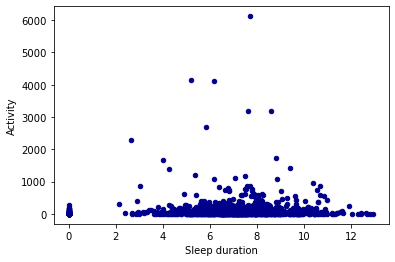

In [18]:
ax1 = outdoor_activity_summer16.plot.scatter(x='Sleep duration',
                      y='Activity',
                      c='DarkBlue')

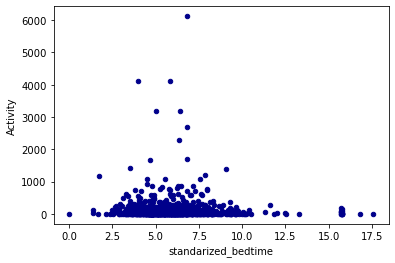

In [19]:
ax2 = outdoor_activity_summer16.plot.scatter(x='standarized_bedtime',
                      y='Activity',
                      c='DarkBlue')

In [20]:
outdoor_activity_summer16 = outdoor_activity_summer16[outdoor_activity_summer16['Activity']<2000]

## Statsmodels OLS

In [21]:
predictors = ['Sleep duration']
X = outdoor_activity_summer16[predictors]
Y = outdoor_activity_summer16['Activity']
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()

<AxesSubplot:xlabel='Sleep duration', ylabel='Activity'>

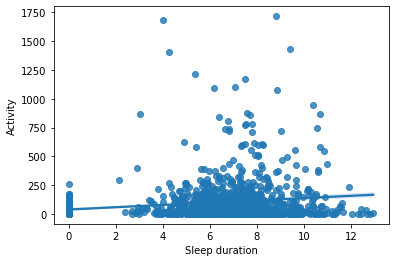

In [22]:
sns.regplot(x='Sleep duration', y='Activity', data=outdoor_activity_summer16)

In [23]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Activity   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     31.01
Date:                Wed, 17 Aug 2022   Prob (F-statistic):           3.23e-08
Time:                        10:06:55   Log-Likelihood:                -7170.2
No. Observations:                1087   AIC:                         1.434e+04
Df Residuals:                    1085   BIC:                         1.435e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             38.3655     12.116      3.166      0.002      14.591      62.140
Sleep duration     9.9014      1.778      5.569      0.000       6.413      13.390
==============================================================================
Omnibus:                      982.308   Durbin-Watson:                   1.493
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30035.229
Skew:                           4.193   Prob(JB):                         0.00
Kurtosis:                      27.348   Cond. No.                         15.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
outdoor_activity_summer16_no_out = outdoor_activity_summer16[outdoor_activity_summer16['Activity']<400]
outdoor_activity_summer16_no_out = outdoor_activity_summer16_no_out[outdoor_activity_summer16_no_out['Sleep duration']>1]

In [25]:
predictors = ['Sleep duration']
X = outdoor_activity_summer16_no_out[predictors]
Y = outdoor_activity_summer16_no_out['Activity']
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()

<AxesSubplot:xlabel='Sleep duration', ylabel='Activity'>

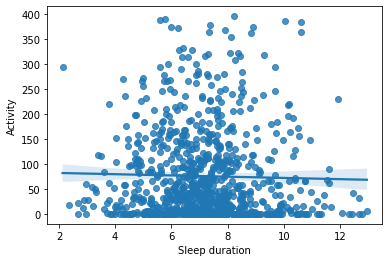

In [26]:
sns.regplot(x='Sleep duration', y='Activity', data=outdoor_activity_summer16_no_out)

In [27]:
outdoor_activity_summer16_no_out[outdoor_activity_summer16_no_out['Sleep duration']>12]

,UID,Date,GroupDayType,Sleep onset,Sleep offset,Sleep duration,Sleep onset MSLM,Sleep offset MSLM,Activity,bedtime,standarized_bedtime
index,,,,,,,,,,,
314,summer_160064,2016-07-23,summer_16Weekend/Holiday,2016-07-24 00:19:45,2016-07-24 12:38:00,12.304167,1459.75,758.00,0.000000,0.316667,5.083347
364,summer_160070,2016-07-14,summer_16Weekday,2016-07-14 23:54:30,2016-07-15 12:52:00,12.958333,1434.50,772.00,6.231409,23.900000,4.666680
513,summer_160049,2016-07-16,summer_16Weekend/Holiday,2016-07-16 21:46:45,2016-07-17 10:12:00,12.420833,1306.75,612.00,0.000000,21.766667,2.533347
524,summer_160015,2016-07-09,summer_16Weekend/Holiday,2016-07-09 22:44:15,2016-07-10 10:48:00,12.062500,1364.25,648.00,2.412060,22.733333,3.500013
649,summer_160020,2016-07-07,summer_16Weekday,2016-07-08 05:34:00,2016-07-08 18:00:45,12.445833,1774.00,1080.75,42.550091,5.566667,10.333347
927,summer_160082,2016-07-17,summer_16Weekend/Holiday,2016-07-18 00:35:15,2016-07-18 13:15:00,12.662500,1475.25,795.00,31.122031,0.583333,5.350013
1063,summer_160051,2016-07-22,summer_16Weekday,2016-07-23 01:45:00,2016-07-23 14:33:00,12.800000,1545.00,873.00,0.000000,1.750000,6.516680
1078,summer_160024,2016-07-03,summer_16Weekend/Holiday,2016-07-03 23:24:30,2016-07-04 12:04:45,12.670833,1404.50,724.75,0.000000,23.400000,4.166680


In [28]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Activity   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.5178
Date:                Wed, 17 Aug 2022   Prob (F-statistic):              0.472
Time:                        10:06:55   Log-Likelihood:                -5146.3
No. Observations:                 873   AIC:                         1.030e+04
Df Residuals:                     871   BIC:                         1.031e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             84.3195     12.661      6.660      0.000      59.470     109.169
Sleep duration    -1.2375      1.720     -0.720      0.472      -4.613       2.138
==============================================================================
Omnibus:                      210.870   Durbin-Watson:                   1.631
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              395.037
Skew:                           1.443   Prob(JB):                     1.66e-86
Kurtosis:                       4.592   Cond. No.                         31.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
predictors = ['standarized_bedtime']
X = outdoor_activity_summer16[predictors]
Y = outdoor_activity_summer16['Activity']
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()

<AxesSubplot:xlabel='standarized_bedtime', ylabel='Activity'>

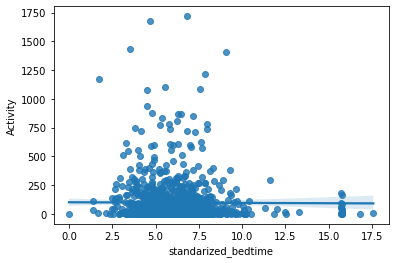

In [30]:
sns.regplot(x='standarized_bedtime', y='Activity', data=outdoor_activity_summer16)

In [31]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Activity   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.04150
Date:                Wed, 17 Aug 2022   Prob (F-statistic):              0.839
Time:                        10:06:56   Log-Likelihood:                -7185.5
No. Observations:                1087   AIC:                         1.438e+04
Df Residuals:                    1085   BIC:                         1.439e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 102.0796     16.902      6.039      0.000      68.915     135.244
standarized_bedtime    -0.5582      2.740     -0.204      0.839      -5.935       4.818
==============================================================================
Omnibus:                      977.159   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            28440.557
Skew:                           4.181   Prob(JB):                         0.00
Kurtosis:                      26.622   Cond. No.                         19.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""